In [1]:
import sys

sys.path.append("../extraction_core/")
from predict import TableExtractor

In [2]:
fields = ['quote-part du capital détenue (en %)',
          'valeur brute comptable des titres détenus (en K euros)',
          'valeur nette comptable des titres détenus (en K euros)',
          "dividendes encaissés par la société en cours d'exercice (en K euros)",
          'résultats (bénéfices ou pertes à 100%) du dernier exercice clos (en K devises)']

regexes = [r'\b(quote-part){e<2}\b',
           r'\b(brute){e<2}\b',
           r'\b(nette){e<2}\b',
           r'\b(dividende){e<4}\b',
           r'\b(resultat){e<3}\b',]

In [3]:
from table_cleaner import TableCleaner

cleaner = TableCleaner(fields, regexes)

In [4]:
import albumentations as album
from albumentations.pytorch.transforms import ToTensorV2
from pathlib import Path
from PIL import Image
from matplotlib import pyplot as plt

transforms = album.Compose([
        album.Resize(896, 896, always_apply=True),
        album.Normalize(),
        ToTensorV2()
    ])
    
checkpoint_path = "projet-ssplab/comptes-sociaux/logs/TableNetModule/version_00/checkpoints/marmot_model.ckpt"
table_extractor = TableExtractor(checkpoint_path=checkpoint_path, transforms=transforms)

TEST_DATA = [
    "305756413",
    "324084698",
    "326300159",
    "331154765",
    "333916385",
    "334303823",
    "344066733",
    "393525852",
    "393712286",
    "411787567",
    "414728337",
    "552065187",
    "552081317",
    "702012956",
    "797080850",
]
TEST_DATA = [
    "305756413"
]
data_dir = "../extraction_core/data/marmot_data"
test_images = [Path(data_dir).joinpath(path + ".bmp") for path in TEST_DATA]

nb_columns = {}
for siren, image_path in zip(TEST_DATA, test_images):
    image = Image.open(image_path)
    out = table_extractor.extract(image, True, False)
    nb_columns[siren] = []
    
    for i, df in enumerate(out['tables']):
        try:
            clean_df = cleaner.clean_df(df)
        except IndexError:
            continue
        nb_columns[siren].append(clean_df.shape[1])
        save_path = siren + "_table_" + str(i) + "_clean.csv"
        with open(save_path, 'w') as f:
            clean_df.to_csv(f)

In [5]:
nb_columns

{'305756413': [4]}

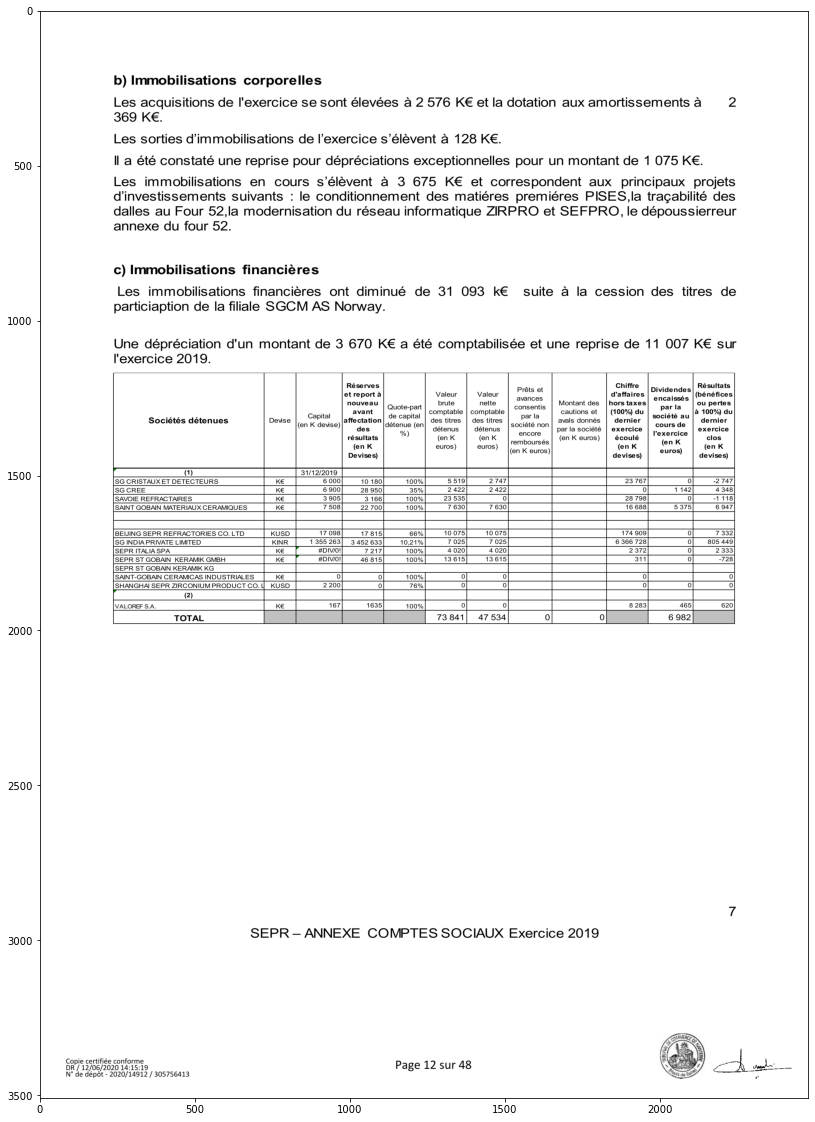

In [6]:
image_path = Path(data_dir).joinpath("305756413.bmp")
image = Image.open(image_path)

plt.rcParams["figure.figsize"] = (40,20)
plt.plot()
plt.imshow(image)

In [7]:
out = table_extractor.extract(image)

In [8]:
out['tables'][0]

,col,col,col,col,col,col,col,col,col,col,col
line_id,,,,,,,,,,,
1,ice 2019.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,Réserves,NaN,NaN,NaN,NaN,NaN,Chiffre,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prêts et,NaN,NaN,jividendes | Résultats
4,NaN,NaN,[,et report à,NaN,Valeur,Valeur,avances,NaN,d'affaires,: La l(pénéfices encaissés
5,Sociétés détenues,Devise,"Capital ,",nouveau avant affectation,uote-part e capital,brute comptable des titres,nette comptable des titres,consentis par la,Montant des cautions et avals donnés,ors taxes 100%) du dernier,Par 4 |3 400%) du ar la ou pertes société au ...
6,NaN,NaN,(en K devise)|',des résultats,tenue (en %),détenus (en K,détenus (en K,société non encore,par la société (en K euros),exercice écoulé,cours de : l'exercice . : exercice
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,remboursés,NaN,NaN,@nk clos
8,NaN,NaN,NaN,(en K,NaN,euros),euros),(en K euros),NaN,(en K,euros) tenK
9,NaN,NaN,NaN,Devises),NaN,NaN,NaN,NaN,NaN,devises),devises)


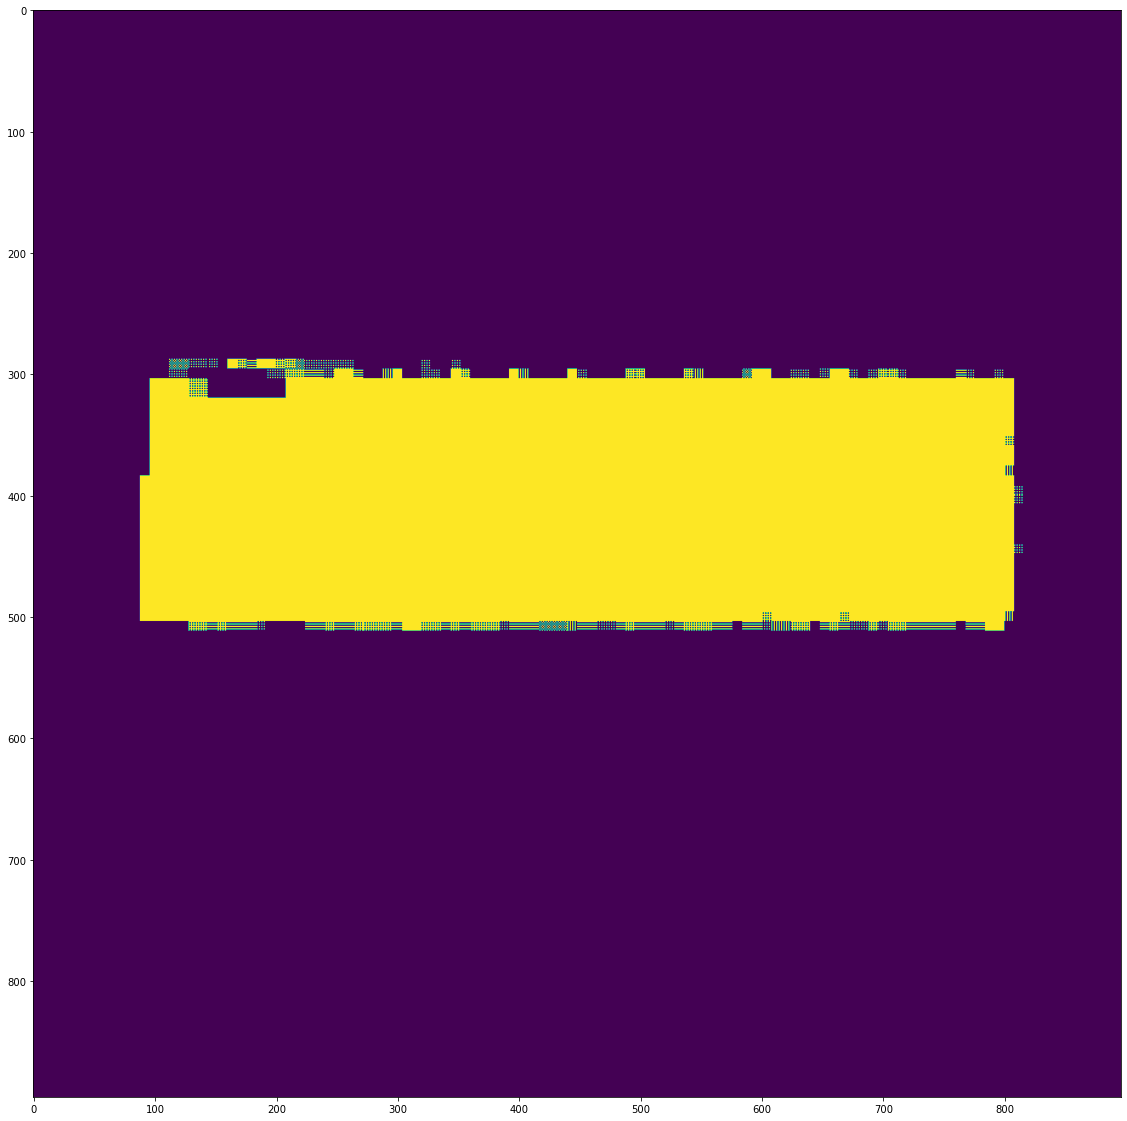

In [9]:
plt.plot()
plt.imshow(out['table_mask'])

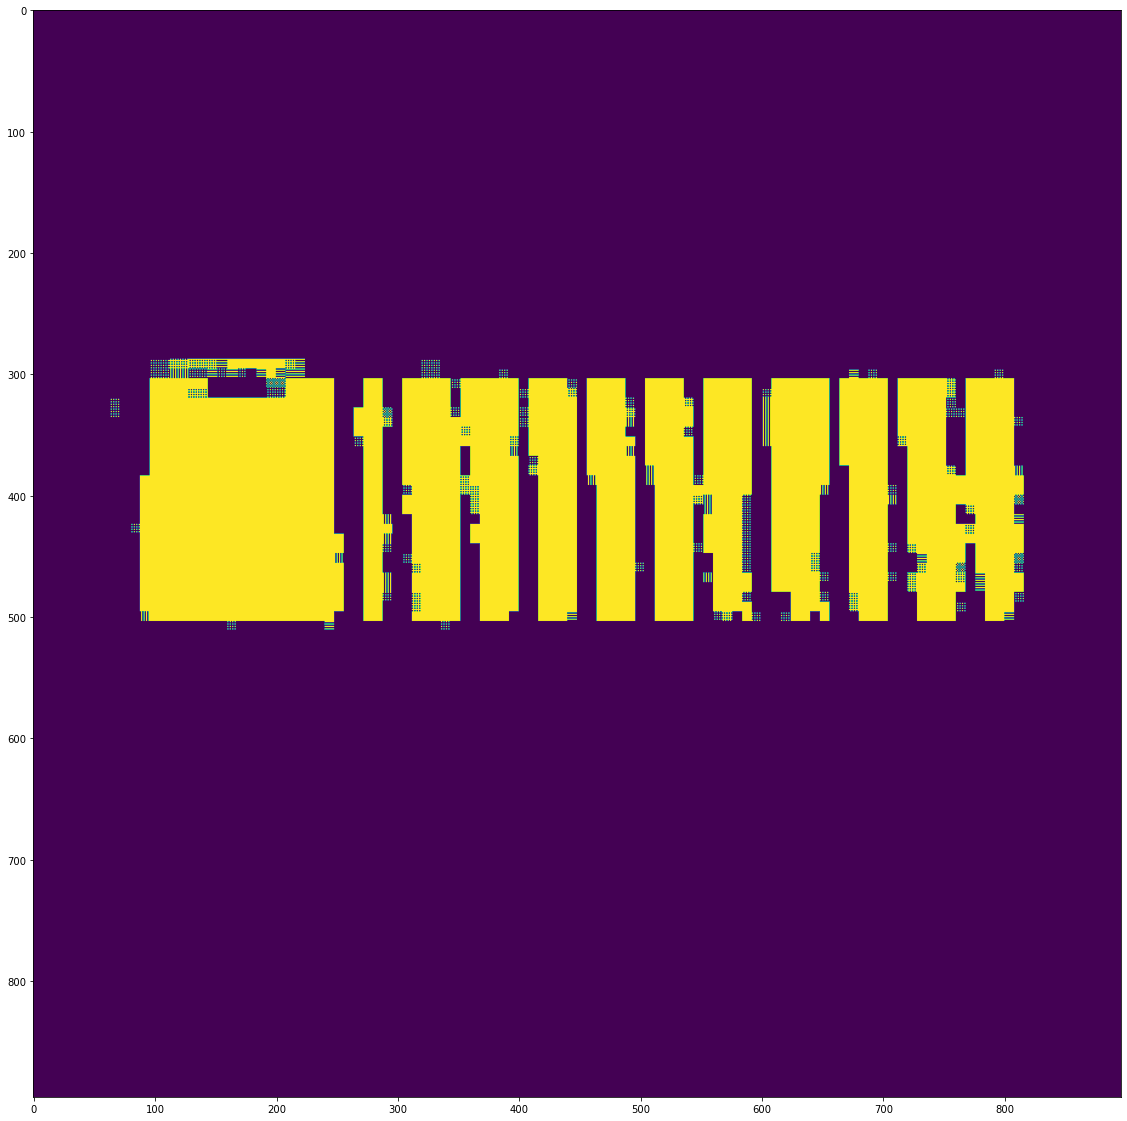

In [10]:
plt.plot()
plt.imshow(out['column_mask'])